# Analysis of Survey results 

survey: https://docs.google.com/forms/d/1m--HTwWfgdFHuE6sXSKue-2OMVs_33NATQE92J9iDhA/edit?usp=forms_home&ths=true

In this notebook we examine the results of how subjects guessed the elbow. We also perform other analysis using PCA and LDA to compare where the "best" elbow is in comparision to what other elbow selection methods claim and the subjects

In [1]:
import pickle
with open('surv_dims.pkl', 'rb') as f:
    surv_dims = pickle.load(f) 

with open('all_data.pkl', 'rb') as f:
    all_data = pickle.load(f)
    
with open('all_ys.pkl', 'rb') as f:
    all_ys = pickle.load(f)
    
with open('dims_ZG_1_all.pkl', 'rb') as f:
    dims_ZG_1_all = pickle.load(f)    

with open('dims_minka_all.pkl', 'rb') as f:
    dims_minka_all = pickle.load(f)
    
with open('dims_ZG_2_all.pkl', 'rb') as f:
    dims_ZG_2_all = pickle.load(f)
    
with open('dims_ZG_h_1_all.pkl', 'rb') as f:
    dims_ZG_h_1_all = pickle.load(f)
    
with open('dims_ZG_h_2_all.pkl', 'rb') as f:
    dims_ZG_h_2_all = pickle.load(f)

In [2]:
import pandas as pd
data = pd.read_csv('Guess the elbow.csv')
data = data.drop(['Timestamp'], axis=1)

In [5]:
true_survey = [int(x) for x in list(data.median(axis = 0))]

Using the basic error caluculation $\frac{Expected - True}{True}$

# Using PCA and LDA in order to find the elbow

first fit PCA with d = n (the number of cols in input array)

Then run LDA on that embedded data using the PCA version of A and the y from original data set

Then per dimension(first, the first dimension. Second, the first two dimensions. Third, the first three dimensions, etc) calculate the missclassification rate. Plot the missclassification rate vs dimension. 



In [5]:
with open('all_miss.pkl', 'rb') as f:
    all_miss = pickle.load(f) 

Missclassification rates vs Dimension

In [8]:
import numpy as np
from matplotlib import pyplot as plt
true_LDA = []
for i in range(len(all_miss)):
    idx = np.abs(np.asarray(all_miss[i]) +  np.min(np.asarray(all_miss[i])) * .05).argmin()
    true_LDA.append(idx)
    # continue 
    # scree_2(all_miss[i], surv_dims[counter]) 
    
with open('true_LDA.pkl', 'wb') as f:
    pickle.dump(true_LDA, f)

In [9]:
with open('true_LDA.pkl', 'rb') as f:
    true_LDA = pickle.load(f)

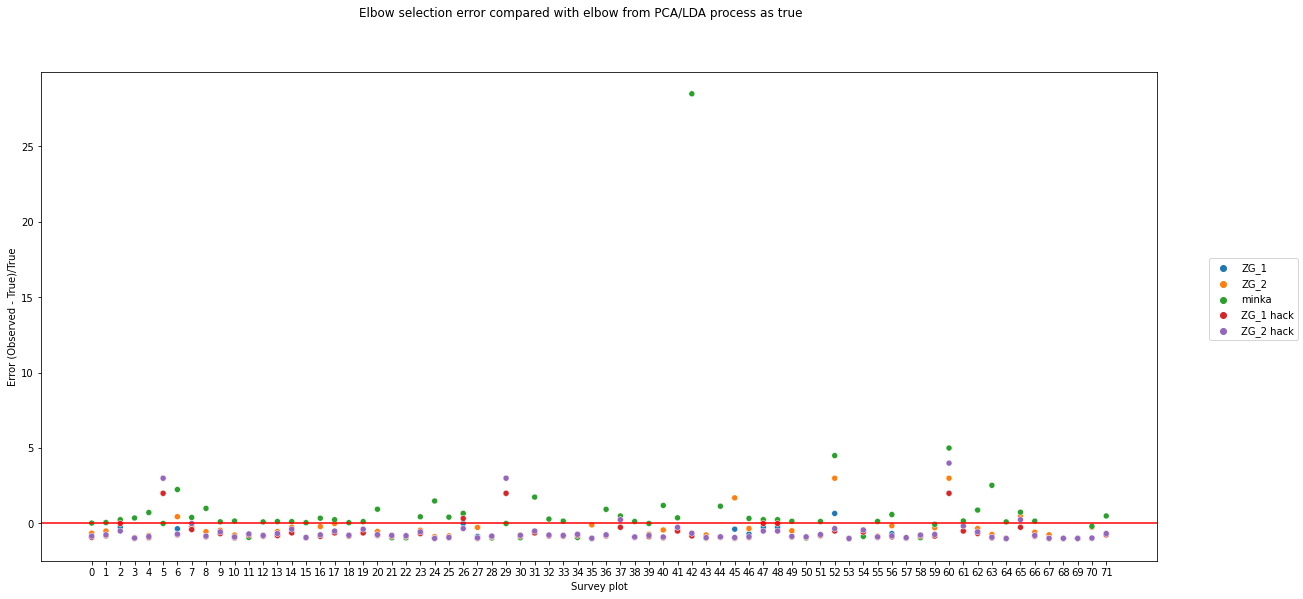

In [13]:
import seaborn as sns
fig, axes = plt.subplots(1, 1)

pca_lda_hist = []
for i in range(len(all_miss)):
    es = [(np.median(dims_ZG_1_all[i]) - true_LDA[i] + 1)/(true_LDA[i] + 1), 
          (np.median(dims_ZG_2_all[i]) - true_LDA[i] + 1)/(true_LDA[i] + 1),  
          (np.median(dims_minka_all[i]) - true_LDA[i] + 1)/ (true_LDA[i] + 1), 
          (np.median(dims_ZG_h_1_all[i]) - true_LDA[i] + 1)/(true_LDA[i] + 1), 
          (np.median(dims_ZG_h_2_all[i]) - true_LDA[i] + 1) /(true_LDA[i] + 1)]
    xs = [i]*5    
    sns.scatterplot(x = xs, y = es, hue = ["ZG_1", "ZG_2", "minka" , "ZG_1 hack", "ZG_2 hack"])
    pca_lda_hist.append(es)
axes.set_xticks(np.arange(len(all_miss)))  
handles, labels = axes.get_legend_handles_labels()
axes.legend().remove()
fig.legend(handles[:5], labels[:5], loc="center right")

fig.set_size_inches(20, 9)
plt.suptitle("Elbow selection error compared with elbow from PCA/LDA process as true")
axes.set_ylabel("Error (Observed - True)/True")
axes.set_xlabel("Survey plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

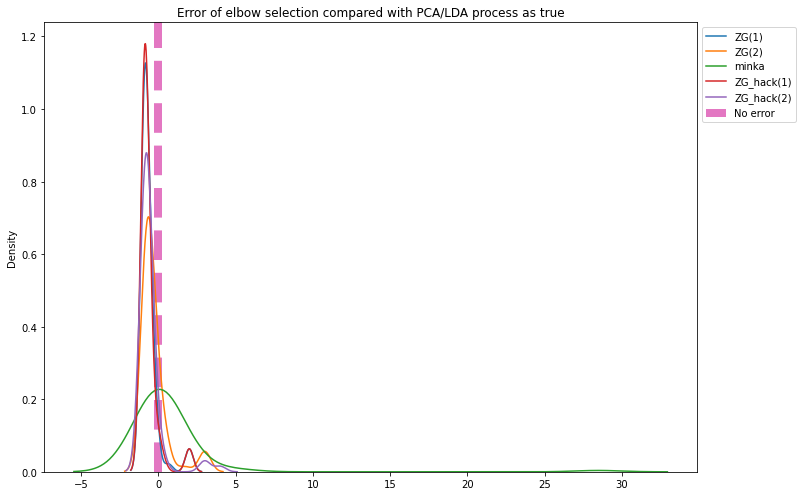

In [12]:
pca_lda_hist = np.asarray(pca_lda_hist)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
labs = ['ZG(1)', 'ZG(2)', 'minka', 'ZG_hack(1)', 'ZG_hack(2)']
colors = sns.color_palette()
for i in range(pca_lda_hist.shape[1]):
    sns.kdeplot(pca_lda_hist[:, i], ax=ax, label = labs[i] )

plt.axvline(0, label='No error', color=colors[6], linewidth = 8, alpha = 1, zorder =  0, ls= "--")
plt.title('Error of elbow selection compared with PCA/LDA process as true')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',)
plt.show()

## Survey results median as true

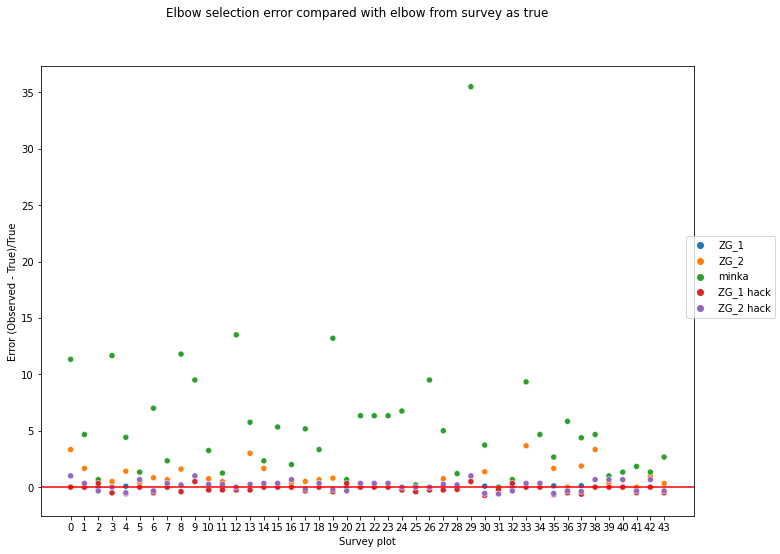

In [13]:
import seaborn as sns
fig, axes = plt.subplots(1, 1)

pca_surv_hist = []
for i in range(len(all_miss)):
    es = [(np.median(dims_ZG_1_all[i]) - true_survey[i] + 1)/(true_survey[i] + 1), 
          (np.median(dims_ZG_2_all[i]) - true_survey[i] + 1)/(true_survey[i] + 1),  
          (np.median(dims_minka_all[i]) - true_survey[i] + 1)/ (true_survey[i] + 1), 
          (np.median(dims_ZG_h_1_all[i]) - true_survey[i] + 1)/(true_survey[i] + 1), 
          (np.median(dims_ZG_h_2_all[i]) - true_survey[i] + 1) /(true_survey[i] + 1)]
    xs = [i]*5    
    sns.scatterplot(x = xs, y = es, hue = ["ZG_1", "ZG_2", "minka" , "ZG_1 hack", "ZG_2 hack"])
    pca_surv_hist.append(es)
axes.set_xticks(np.arange(len(all_miss)))  
handles, labels = axes.get_legend_handles_labels()
axes.legend().remove()
fig.legend(handles[:5], labels[:5], loc="center right")

fig.set_size_inches(20, 9)
fig.show()
plt.suptitle("Elbow selection error compared with elbow from survey as true")
axes.set_ylabel("Error (Observed - True)/True")
axes.set_xlabel("Survey plot")
plt.axhline(y=0, color='r', linestyle='-')
    

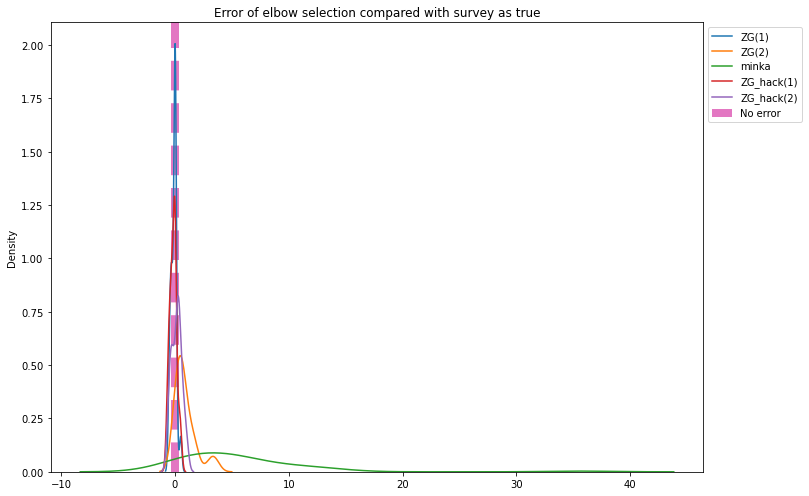

In [14]:
pca_surv_hist = np.asarray(pca_surv_hist)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
labs = ['ZG(1)', 'ZG(2)', 'minka', 'ZG_hack(1)', 'ZG_hack(2)']
colors = sns.color_palette()
for i in range(pca_surv_hist.shape[1]):
    sns.kdeplot(pca_surv_hist[:, i], ax=ax, label = labs[i] )

plt.axvline(0, label='No error', color=colors[6], linewidth = 8, alpha = 1, zorder =  0, ls= "--")
plt.title('Error of elbow selection compared with survey as true')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',)
plt.show()

In [ ]:
changes : 
    do seaborn context
do rugplot